In [1]:
import matplotlib.pyplot as plt
import numpy as np

[[1078 -535]
 [1086 -274]
 [ 845 -274]
 [ 793 -112]
 [1329 -643]
 [ 305 -643]
 [ 458  793]
 [ 305  410]
 [ 994  793]
 [1329  410]
 [ 577  -26]
 [ 793  410]
 [1329 -277]
 [ 577 -426]
 [ 458  410]
 [ 994  410]
 [ 577 -643]
 [1078 -643]
 [ 305  -26]
 [ 577 -112]
 [1240 -277]
 [ 305 -426]]
[[ 461.5192957  2688.34989746]
 [ 998.03547695 2682.58090627]
 [ 989.38199016 2319.1344609 ]
 [ 299.98754221 2322.0189565 ]
 [ 282.68056862 1254.75558519]
 [1306.67650596 1257.64008079]
 [1326.86797514 2336.44143449]
 [ 432.67433972 2350.86391248]
 [ 331.71699379 1889.34461678]
 [ 576.89911963 1877.80663439]
 [ 571.13012843 1318.21448835]
 [ 331.71699379 1318.21448835]
 [ 787.46729829 2270.09803573]
 [ 775.9293159  1788.38727084]
 [ 585.55260642 1794.15626204]
 [ 585.55260642 1880.69112998]
 [ 320.17901139 1903.76709477]
 [ 331.71699379 2284.52051372]]
2.884495598135782
aligned [[ 483.83872708  790.59431227]
 [1020.35490834  784.82532108]
 [1011.70142154  421.37887571]
 [ 322.30697359  424.26337131]
 [ 3

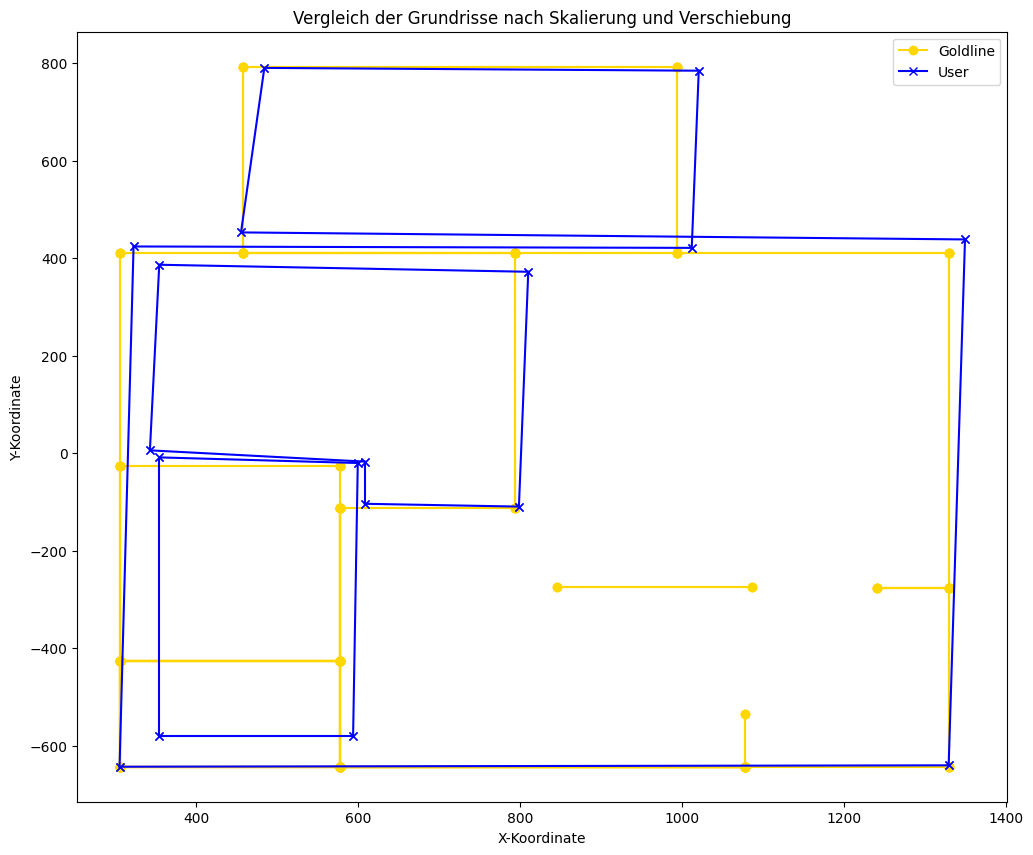

In [12]:
#neuer ansatz: skalierte punkte vom user erhalten. dann diese mit den punkten des goldlabes vergleichen

import numpy as np
import matplotlib.pyplot as plt

# Helferfunktion zum Umformen der Punkte
def reshape_points(points):
    return np.array(points).reshape(-1, 2)

goldline_data = {
    "segmentPoints": [
        1078, -535, 1086, -274, 845, -274, 793, -112, 1329, -643, 305, -643, 
        458, 793, 305, 410, 994, 793, 1329, 410, 577, -26, 793, 410, 1329, 
        -277, 577, -426, 458, 410, 994, 410, 577, -643, 1078, -643, 305, -26, 
        577, -112, 1240, -277, 305, -426
    ],
    "pointOrder": [
        0, 17, 17, 4, 4, 12, 12, 20, 20, 12, 12, 9, 9, 15, 15, 8, 8, 6, 6, 
        14, 14, 11, 11, 14, 14, 7, 7, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 
        16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 
        21, 13, 13, 21, 21, 13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 
        13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 
        18, 10, 10, 19, 19, 3, 3, 11, 11, 15, 15, 11, 11, 3, 3, 19, 19, 
        10, 10, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 
        19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 13, 13, 21, 21, 
        13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 
        13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 18, 7, 7, 14, 14, 
        11, 11, 14, 14, 6, 6, 8, 8, 15, 15, 9, 9, 12, 12, 20, 20, 12, 12, 
        4, 4, 17, 17, 0, 2, 1, 1, 2
    ]
}

user_data = {
    "segmentPoints": [
        160, 932, 346, 930, 343, 804, 104, 805, 98, 435, 453, 436, 460, 810, 
        150, 815, 115, 655, 200, 651, 198, 457, 115, 457, 273, 787, 269, 620, 
        203, 622, 203, 652, 111, 660, 115, 792
    ],
    "pointOrder": [
        0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 0, 8, 9, 9, 10, 10, 
        11, 11, 8, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 12
    ]
}

# Umforme die Punkte
goldline_points = reshape_points(goldline_data["segmentPoints"])
user_points = reshape_points(user_data["segmentPoints"])

print(goldline_points)


# Bestimme die Extrempunkte
def get_extreme_points(points):
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    min_y = np.min(points[:, 1])
    max_y = np.max(points[:, 1])
    
    bottom_left = points[np.argmin(points[:, 0] + points[:, 1])]
    top_right = points[np.argmax(points[:, 0] - points[:, 1])]
    
    return bottom_left, top_right

# Bestimme die Extrempunkte
goldline_bottom_left, goldline_top_right = get_extreme_points(goldline_points)
user_bottom_left, user_top_right = get_extreme_points(user_points)

# Berechne die Längen der Diagonalen
def calculate_diagonal_length(p1, p2):
    return np.linalg.norm(p1 - p2)

goldline_diagonal_length = calculate_diagonal_length(goldline_bottom_left, goldline_top_right)
user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

# Berechne den Skalierungsfaktor
scale_factor = goldline_diagonal_length / user_diagonal_length



# Skaliere die Benutzerpunkte
def scale_points(points, factor):
    return points * factor


scaled_user_points = scale_points(user_points, scale_factor)

print(scaled_user_points)
print(scale_factor)

# Berechne die Verschiebung
def calculate_translation_vector(source_bottom_left, target_bottom_left, factor):
    return target_bottom_left - (source_bottom_left * factor)

translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

# Wende die Verschiebung auf die skalierten Punkte an
def translate_points(points, translation):
    return points + translation

aligned_user_points = translate_points(scaled_user_points, translation_vector)


print("aligned",aligned_user_points)
# Plot der beiden Grundrisse
plt.figure(figsize=(12, 10))

# Goldline zeichnen
for i in range(0, len(goldline_data["pointOrder"]) - 1, 2):
    p1 = goldline_data["pointOrder"][i]
    p2 = goldline_data["pointOrder"][i+1]
    plt.plot(
        [goldline_points[p1][0], goldline_points[p2][0]],
        [goldline_points[p1][1], goldline_points[p2][1]],
        color='gold', marker='o', label='Goldline' if i == 0 else ""
    )

# Benutzergrundriss zeichnen (skaliert und verschoben)
for i in range(0, len(user_data["pointOrder"]) - 1, 2):
    p1 = user_data["pointOrder"][i]
    p2 = user_data["pointOrder"][i+1]
    plt.plot(
        [aligned_user_points[p1][0], aligned_user_points[p2][0]],
        [aligned_user_points[p1][1], aligned_user_points[p2][1]],
        color='blue', marker='x', label='User' if i == 0 else ""
    )

plt.legend()
plt.title('Vergleich der Grundrisse nach Skalierung und Verschiebung')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.show()


In [14]:
%reset


Nothing done.


In [4]:

# Helferfunktion zum Umformen der Punkte
def reshape_points(points):
    return np.array(points).reshape(-1, 2)

goldline_data = {"segmentPoints": [
1078, -535, 1086, -274, 845, -274, 793, -112, 1329, -643, 305, -643, 458, 793, 305, 410, 994, 793, 1329, 410, 577, -26, 793, 410, 1329, -277, 577, -426, 458, 410, 994, 410, 577, -643, 1078, -643, 305, -26, 577, -112, 1240, -277, 305, -426
],
"pointOrder": [
0, 17, 17, 4, 4, 12, 12, 20, 20, 12, 12, 9, 9, 15, 15, 8, 8, 6, 6, 14, 14, 11, 11, 14, 14, 7, 7, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 13, 13, 21, 21, 13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 18, 10, 10, 19, 19, 3, 3, 11, 11, 15, 15, 11, 11, 3, 3, 19, 19, 10, 10, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 13, 13, 21, 21, 13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 18, 7, 7, 14, 14, 11, 11, 14, 14, 6, 6, 8, 8, 15, 15, 9, 9, 12, 12, 20, 20, 12, 12, 4, 4, 17, 17, 0, 2, 1, 1, 2
]
}

user_data_list = [
{"segmentPoints": [
326, 597, 329, 862, 242, 860, 243, 948, 114, 950, 114, 862, 241, 862, 194, 865, 74, 866, 73, 751, 143, 750, 142, 727, 193, 729, 193, 867, 73, 868, 72, 594, 141, 596, 140, 749, 73, 750, 71, 597
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 0
]
},
{"segmentPoints": [
1078, -335, 1080, 527, 805, 526, 809, 829, 370, 831, 369, 527, 806, 527, 250, 530, 245, 175, 475, 167, 463, -329, 245, -324, 244, 177, 245, -323, 689, -31, 880, -33, 690, -30
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 0, 14, 15, 15, 16, 16, 14
]
},
{"segmentPoints": [
160, 932, 346, 930, 343, 804, 104, 805, 98, 435, 453, 436, 460, 810, 150, 815, 115, 655, 200, 651, 198, 457, 115, 457, 273, 787, 269, 620, 203, 622, 203, 652, 111, 660, 115, 792
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 0, 8, 9, 9, 10, 10, 11, 11, 8, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 12
]
},
{"segmentPoints": [
54, 904, 224, 901, 224, 732, 54, 731, 62, 831, 97, 831, 130, 818, 132, 897, 130, 819, 97, 818, 94, 796, 95, 737, 94, 797, 59, 765, 74, 765, 58, 766
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 0, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 4, 10, 11, 11, 12, 12, 10, 13, 14, 14, 15, 15, 13
]
},
{"segmentPoints": [
145, 707, 233, 704, 232, 896, 501, 894, 501, 703, 234, 702, 668, 700, 668, 499, 667, 170, 283, 174, 290, 195, 290, 288, 290, 309.59199999999987, 293, 443, 397, 445, 399, 700, 397, 443, 294, 442, 293, 483, 172, 484, 167, 288, 287, 288, 287, 193, 171, 195, 167, 288, 170, 196, 290, 196, 286, 170, 145, 170
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 0
]
},
{"segmentPoints": [
79, 847, 370, 845, 365, 542, 77, 542, 90, 723, 161, 721, 161, 699, 215, 698, 215, 830, 223, 830, 220, 694, 157, 693, 156, 717, 153, 560, 155, 691, 162, 691
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 0, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 4, 13, 14, 14, 15, 15, 13
]
},
{"segmentPoints": [
80, 843, 121, 842, 122, 947, 267, 946, 267, 845, 124, 843, 212, 845, 356, 842, 355, 561, 76, 562, 80, 842, 80, 730, 155, 730, 156, 707, 152, 566, 156, 706, 211, 704, 212, 846, 227, 662, 286, 662, 225, 662, 288, 662
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 0, 18, 19, 19, 20, 20, 21, 21, 18
]
},
{"segmentPoints": [
126, 770, 533, 764, 533, 339, 116, 344
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 0
]
},
{"segmentPoints": [
299, 627, 299, 627, 304, 870, 303, 872, 226, 868, 227, 951, 104, 954, 101, 870, 222, 869, 70, 872, 66, 772, 131, 769, 132, 746, 180, 750, 178, 869, 72, 870, 66, 678, 99, 680, 68, 677, 66, 630, 131, 628, 132, 743, 130, 630, 243, 630, 245, 588, 249, 628, 195, 713, 246, 712, 246, 692, 245, 711
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 0, 26, 27, 27, 28, 28, 29, 29, 26
]
},
{"segmentPoints": [
75, 581, 150, 580, 150, 712, 150, 580, 341, 580, 342, 850, 254, 847, 257, 953, 118, 950, 115, 853, 253, 848, 78, 851, 78, 740, 150, 738, 150, 712, 203, 716, 204, 849, 79, 850, 217, 675, 278, 674, 218, 673
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 0, 18, 19, 19, 20, 20, 18
]
},
{"segmentPoints": [
464, 420, 466, 792, 353, 794, 350, 924, 164, 927, 163, 796, 353, 792, 278, 792, 278, 614, 205, 607, 205, 639, 105, 642, 108, 797, 160, 796, 104, 796, 101, 422, 199, 425, 204, 606, 201, 424, 298, 552, 379, 552, 296, 551
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 0, 19, 20, 20, 21, 21, 19
]
}
]



# # Umforme die Punkte
# goldline_points = reshape_points(goldline_data["segmentPoints"])
# user_points = reshape_points(user_data["segmentPoints"])

# print(goldline_points)


# Bestimme die Extrempunkte
def get_extreme_points(points):
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    min_y = np.min(points[:, 1])
    max_y = np.max(points[:, 1])
    
    bottom_left = points[np.argmin(points[:, 0] + points[:, 1])]
    top_right = points[np.argmax(points[:, 0] - points[:, 1])]
    
    return bottom_left, top_right

# Bestimme die Extrempunkte
goldline_bottom_left, goldline_top_right = get_extreme_points(goldline_points)
user_bottom_left, user_top_right = get_extreme_points(user_points)

# Berechne die Längen der Diagonalen
def calculate_diagonal_length(p1, p2):
    return np.linalg.norm(p1 - p2)

goldline_diagonal_length = calculate_diagonal_length(goldline_bottom_left, goldline_top_right)
user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

# Berechne den Skalierungsfaktor
scale_factor = goldline_diagonal_length / user_diagonal_length



# Skaliere die Benutzerpunkte
def scale_points(points, factor):
    return points * factor


scaled_user_points = scale_points(user_points, scale_factor)

print(scaled_user_points)
print(scale_factor)

# Berechne die Verschiebung
def calculate_translation_vector(source_bottom_left, target_bottom_left, factor):
    return target_bottom_left - (source_bottom_left * factor)

translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

# Wende die Verschiebung auf die skalierten Punkte an
def translate_points(points, translation):
    return points + translation

aligned_user_points = translate_points(scaled_user_points, translation_vector)



# Umforme die Punkte
goldline_points = reshape_points(goldline_data["segmentPoints"])

def get_extreme_points(points):
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    min_y = np.min(points[:, 1])
    max_y = np.max(points[:, 1])
    
    bottom_left = points[np.argmin(points[:, 0] + points[:, 1])]
    top_right = points[np.argmax(points[:, 0] - points[:, 1])]
    
    return bottom_left, top_right

goldline_bottom_left, goldline_top_right = get_extreme_points(goldline_points)
#goldline_diagonal_length = calculate_diagonal_length(goldline_bottom_left, goldline_top_right)

# Plot der beiden Grundrisse
plt.figure(figsize=(12, 10))

# Goldline zeichnen
for i in range(0, len(goldline_data["pointOrder"]) - 1, 2):
    p1 = goldline_data["pointOrder"][i]
    p2 = goldline_data["pointOrder"][i+1]
    plt.plot(
        [goldline_points[p1][0], goldline_points[p2][0]],
        [goldline_points[p1][1], goldline_points[p2][1]],
        color='gold', marker='o', label='Goldline' if i == 0 else ""
    )

# Verarbeite jedes Benutzerdaten-Set
colors = ['blue']  # Farben für die Benutzerdaten
for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Benutzergrundriss zeichnen (skaliert und verschoben)
    for i in range(0, len(user_data["pointOrder"]) - 1, 2):
        p1 = user_data["pointOrder"][i]
        p2 = user_data["pointOrder"][i+1]
        plt.plot(
            [aligned_user_points[p1][0], aligned_user_points[p2][0]],
            [aligned_user_points[p1][1], aligned_user_points[p2][1]],
            color=colors[idx % len(colors)], marker='x', label=f'User {idx+1}' if i == 0 else ""
        )

plt.legend()
plt.title('Vergleich der Grundrisse nach Skalierung und Verschiebung')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.show()

NameError: name 'user_points' is not defined

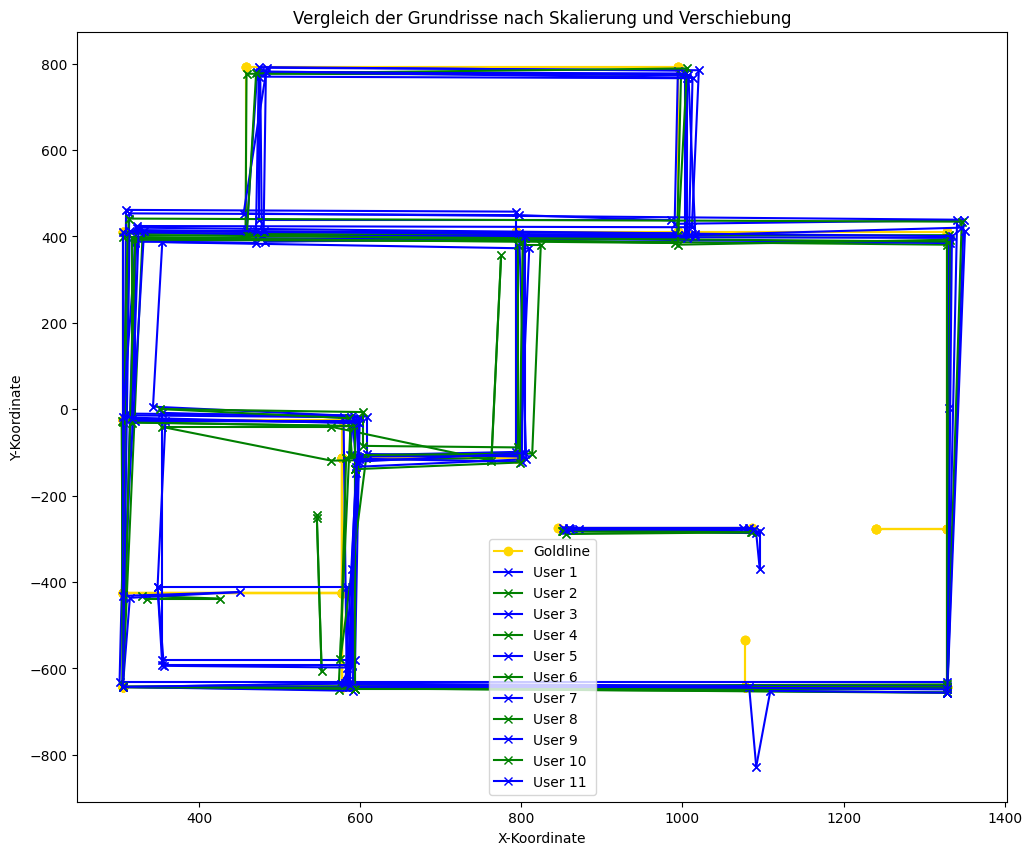

In [2]:
goldline_data = {"segmentPoints": [
1078, -535, 1086, -274, 845, -274, 793, -112, 1329, -643, 305, -643, 458, 793, 305, 410, 994, 793, 1329, 410, 577, -26, 793, 410, 1329, -277, 577, -426, 458, 410, 994, 410, 577, -643, 1078, -643, 305, -26, 577, -112, 1240, -277, 305, -426
],
"pointOrder": [
0, 17, 17, 4, 4, 12, 12, 20, 20, 12, 12, 9, 9, 15, 15, 8, 8, 6, 6, 14, 14, 11, 11, 14, 14, 7, 7, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 13, 13, 21, 21, 13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 18, 10, 10, 19, 19, 3, 3, 11, 11, 15, 15, 11, 11, 3, 3, 19, 19, 10, 10, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 13, 13, 21, 21, 13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 18, 7, 7, 14, 14, 11, 11, 14, 14, 6, 6, 8, 8, 15, 15, 9, 9, 12, 12, 20, 20, 12, 12, 4, 4, 17, 17, 0, 2, 1, 1, 2
]
}

user_data_list = [
{"segmentPoints": [
326, 597, 329, 862, 242, 860, 243, 948, 114, 950, 114, 862, 241, 862, 194, 865, 74, 866, 73, 751, 143, 750, 142, 727, 193, 729, 193, 867, 73, 868, 72, 594, 141, 596, 140, 749, 73, 750, 71, 597
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 0
]
},
{"segmentPoints": [
1078, -335, 1080, 527, 805, 526, 809, 829, 370, 831, 369, 527, 806, 527, 250, 530, 245, 175, 475, 167, 463, -329, 245, -324, 244, 177, 245, -323, 689, -31, 880, -33, 690, -30
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 0, 14, 15, 15, 16, 16, 14
]
},
{"segmentPoints": [
160, 932, 346, 930, 343, 804, 104, 805, 98, 435, 453, 436, 460, 810, 150, 815, 115, 655, 200, 651, 198, 457, 115, 457, 273, 787, 269, 620, 203, 622, 203, 652, 111, 660, 115, 792
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 0, 8, 9, 9, 10, 10, 11, 11, 8, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 12
]
},
{"segmentPoints": [
54, 904, 224, 901, 224, 732, 54, 731, 62, 831, 97, 831, 130, 818, 132, 897, 130, 819, 97, 818, 94, 796, 95, 737, 94, 797, 59, 765, 74, 765, 58, 766
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 0, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 4, 10, 11, 11, 12, 12, 10, 13, 14, 14, 15, 15, 13
]
},
{"segmentPoints": [
145, 707, 233, 704, 232, 896, 501, 894, 501, 703, 234, 702, 668, 700, 668, 499, 667, 170, 283, 174, 290, 195, 290, 288, 290, 309.59199999999987, 293, 443, 397, 445, 399, 700, 397, 443, 294, 442, 293, 483, 172, 484, 167, 288, 287, 288, 287, 193, 171, 195, 167, 288, 170, 196, 290, 196, 286, 170, 145, 170
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 0
]
},
{"segmentPoints": [
79, 847, 370, 845, 365, 542, 77, 542, 90, 723, 161, 721, 161, 699, 215, 698, 215, 830, 223, 830, 220, 694, 157, 693, 156, 717, 153, 560, 155, 691, 162, 691
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 0, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 4, 13, 14, 14, 15, 15, 13
]
},
{"segmentPoints": [
80, 843, 121, 842, 122, 947, 267, 946, 267, 845, 124, 843, 212, 845, 356, 842, 355, 561, 76, 562, 80, 842, 80, 730, 155, 730, 156, 707, 152, 566, 156, 706, 211, 704, 212, 846, 227, 662, 286, 662, 225, 662, 288, 662
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 0, 18, 19, 19, 20, 20, 21, 21, 18
]
},
{"segmentPoints": [
126, 770, 533, 764, 533, 339, 116, 344
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 0
]
},
{"segmentPoints": [
299, 627, 299, 627, 304, 870, 303, 872, 226, 868, 227, 951, 104, 954, 101, 870, 222, 869, 70, 872, 66, 772, 131, 769, 132, 746, 180, 750, 178, 869, 72, 870, 66, 678, 99, 680, 68, 677, 66, 630, 131, 628, 132, 743, 130, 630, 243, 630, 245, 588, 249, 628, 195, 713, 246, 712, 246, 692, 245, 711
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 0, 26, 27, 27, 28, 28, 29, 29, 26
]
},
{"segmentPoints": [
75, 581, 150, 580, 150, 712, 150, 580, 341, 580, 342, 850, 254, 847, 257, 953, 118, 950, 115, 853, 253, 848, 78, 851, 78, 740, 150, 738, 150, 712, 203, 716, 204, 849, 79, 850, 217, 675, 278, 674, 218, 673
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 0, 18, 19, 19, 20, 20, 18
]
},
{"segmentPoints": [
464, 420, 466, 792, 353, 794, 350, 924, 164, 927, 163, 796, 353, 792, 278, 792, 278, 614, 205, 607, 205, 639, 105, 642, 108, 797, 160, 796, 104, 796, 101, 422, 199, 425, 204, 606, 201, 424, 298, 552, 379, 552, 296, 551
],
"pointOrder": [
0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 0, 19, 20, 20, 21, 21, 19
]
}
]


# Helferfunktion zum Umformen der Punkte
def reshape_points(points):
    return np.array(points).reshape(-1, 2)

# Funktion zum Bestimmen der Extrempunkte
def get_extreme_points(points):
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    min_y = np.min(points[:, 1])
    max_y = np.max(points[:, 1])
    
    bottom_left = points[np.argmin(points[:, 0] + points[:, 1])]
    top_right = points[np.argmax(points[:, 0] - points[:, 1])]
    
    return bottom_left, top_right

# Funktion zur Berechnung der Diagonalenlänge
def calculate_diagonal_length(p1, p2):
    return np.linalg.norm(p1 - p2)

# Funktion zur Skalierung der Punkte
def scale_points(points, factor):
    return points * factor

# Funktion zur Berechnung des Verschiebungsvektors
def calculate_translation_vector(source_bottom_left, target_bottom_left, factor):
    return target_bottom_left - (source_bottom_left * factor)

# Funktion zur Anwendung der Verschiebung auf die Punkte
def translate_points(points, translation):
    return points + translation

# Umforme die Goldline Punkte
goldline_points = reshape_points(goldline_data["segmentPoints"])
goldline_bottom_left, goldline_top_right = get_extreme_points(goldline_points)
goldline_diagonal_length = calculate_diagonal_length(goldline_bottom_left, goldline_top_right)

# Plot der beiden Grundrisse
plt.figure(figsize=(12, 10))

# Goldline zeichnen
for i in range(0, len(goldline_data["pointOrder"]) - 1, 2):
    p1 = goldline_data["pointOrder"][i]
    p2 = goldline_data["pointOrder"][i+1]
    plt.plot(
        [goldline_points[p1][0], goldline_points[p2][0]],
        [goldline_points[p1][1], goldline_points[p2][1]],
        color='gold', marker='o', label='Goldline' if i == 0 else ""
    )

# Verarbeite jedes Benutzerdaten-Set
colors = ['blue', 'green']  # Farben für die Benutzerdaten
for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Benutzergrundriss zeichnen (skaliert und verschoben)
    for i in range(0, len(user_data["pointOrder"]) - 1, 2):
        p1 = user_data["pointOrder"][i]
        p2 = user_data["pointOrder"][i+1]
        plt.plot(
            [aligned_user_points[p1][0], aligned_user_points[p2][0]],
            [aligned_user_points[p1][1], aligned_user_points[p2][1]],
            color=colors[idx % len(colors)], marker='x', label=f'User {idx+1}' if i == 0 else ""
        )

plt.legend()
plt.title('Vergleich der Grundrisse nach Skalierung und Verschiebung')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.show()

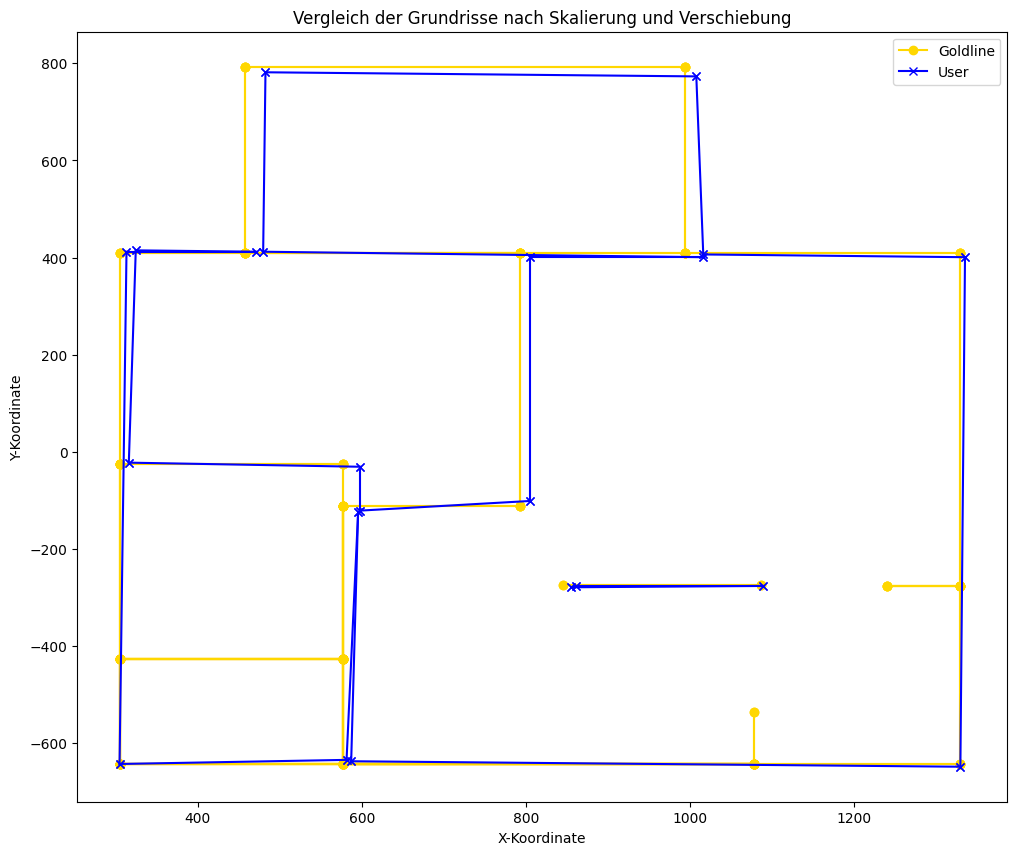

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Helferfunktion zum Umformen der Punkte
def reshape_points(points):
    return np.array(points).reshape(-1, 2)

goldline_data = {
    "segmentPoints": [
        1078, -535, 1086, -274, 845, -274, 793, -112, 1329, -643, 305, -643, 
        458, 793, 305, 410, 994, 793, 1329, 410, 577, -26, 793, 410, 1329, 
        -277, 577, -426, 458, 410, 994, 410, 577, -643, 1078, -643, 305, -26, 
        577, -112, 1240, -277, 305, -426
    ],
    "pointOrder": [
        0, 17, 17, 4, 4, 12, 12, 20, 20, 12, 12, 9, 9, 15, 15, 8, 8, 6, 6, 
        14, 14, 11, 11, 14, 14, 7, 7, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 
        16, 16, 13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 
        21, 13, 13, 21, 21, 13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 
        13, 13, 19, 19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 
        18, 10, 10, 19, 19, 3, 3, 11, 11, 15, 15, 11, 11, 3, 3, 19, 19, 
        10, 10, 18, 18, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 
        19, 13, 13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 13, 13, 21, 21, 
        13, 13, 21, 21, 5, 5, 16, 16, 17, 17, 16, 16, 13, 13, 19, 19, 13, 
        13, 16, 16, 17, 17, 16, 16, 5, 5, 21, 21, 18, 18, 7, 7, 14, 14, 
        11, 11, 14, 14, 6, 6, 8, 8, 15, 15, 9, 9, 12, 12, 20, 20, 12, 12, 
        4, 4, 17, 17, 0, 2, 1, 1, 2
    ]
}

user_data = {
    "segmentPoints": [
        160, 932, 346, 930, 343, 804, 104, 805, 98, 435, 453, 436, 460, 810, 
        150, 815, 115, 655, 200, 651, 198, 457, 115, 457, 273, 787, 269, 620, 
        203, 622, 203, 652, 111, 660, 115, 792
    ],
    "pointOrder": [
        0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 0, 8, 9, 9, 10, 10, 
        11, 11, 8, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 12
    ]
    
}

# Umforme die Punkte
goldline_points = reshape_points(goldline_data["segmentPoints"])
user_points = reshape_points(user_data["segmentPoints"])

# Bestimme die Extrempunkte
def get_extreme_points(points):
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    min_y = np.min(points[:, 1])
    max_y = np.max(points[:, 1])
    
    bottom_left = points[np.argmin(points[:, 0] + points[:, 1])]
    top_right = points[np.argmax(points[:, 0] - points[:, 1])]
    
    return bottom_left, top_right

goldline_bottom_left, goldline_top_right = get_extreme_points(goldline_points)
user_bottom_left, user_top_right = get_extreme_points(user_points)

# Berechne die Längen der Diagonalen
def calculate_diagonal_length(p1, p2):
    return np.linalg.norm(p1 - p2)

goldline_diagonal_length = calculate_diagonal_length(goldline_bottom_left, goldline_top_right)
user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

# Berechne den Skalierungsfaktor
scale_factor = goldline_diagonal_length / user_diagonal_length

# Skaliere die Benutzerpunkte
def scale_points(points, factor):
    return points * factor

scaled_user_points = scale_points(user_points, scale_factor)

# Berechne die Verschiebung
def calculate_translation_vector(source_bottom_left, target_bottom_left, factor):
    return target_bottom_left - (source_bottom_left * factor)

translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

# Wende die Verschiebung auf die skalierten Punkte an
def translate_points(points, translation):
    return points + translation

aligned_user_points = translate_points(scaled_user_points, translation_vector)


# Plot der beiden Grundrisse
plt.figure(figsize=(12, 10))

# Goldline zeichnen
for i in range(0, len(goldline_data["pointOrder"]) - 1, 2):
    p1 = goldline_data["pointOrder"][i]
    p2 = goldline_data["pointOrder"][i+1]
    plt.plot(
        [goldline_points[p1][0], goldline_points[p2][0]],
        [goldline_points[p1][1], goldline_points[p2][1]],
        color='gold', marker='o', label='Goldline' if i == 0 else ""
    )

# Benutzergrundriss zeichnen (skaliert und verschoben)
for i in range(0, len(user_data["pointOrder"]) - 1, 2):
    p1 = user_data["pointOrder"][i]
    p2 = user_data["pointOrder"][i+1]
    plt.plot(
        [aligned_user_points[p1][0], aligned_user_points[p2][0]],
        [aligned_user_points[p1][1], aligned_user_points[p2][1]],
        color='blue', marker='x', label='User' if i == 0 else ""
    )

plt.legend()
plt.title('Vergleich der Grundrisse nach Skalierung und Verschiebung')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.show()


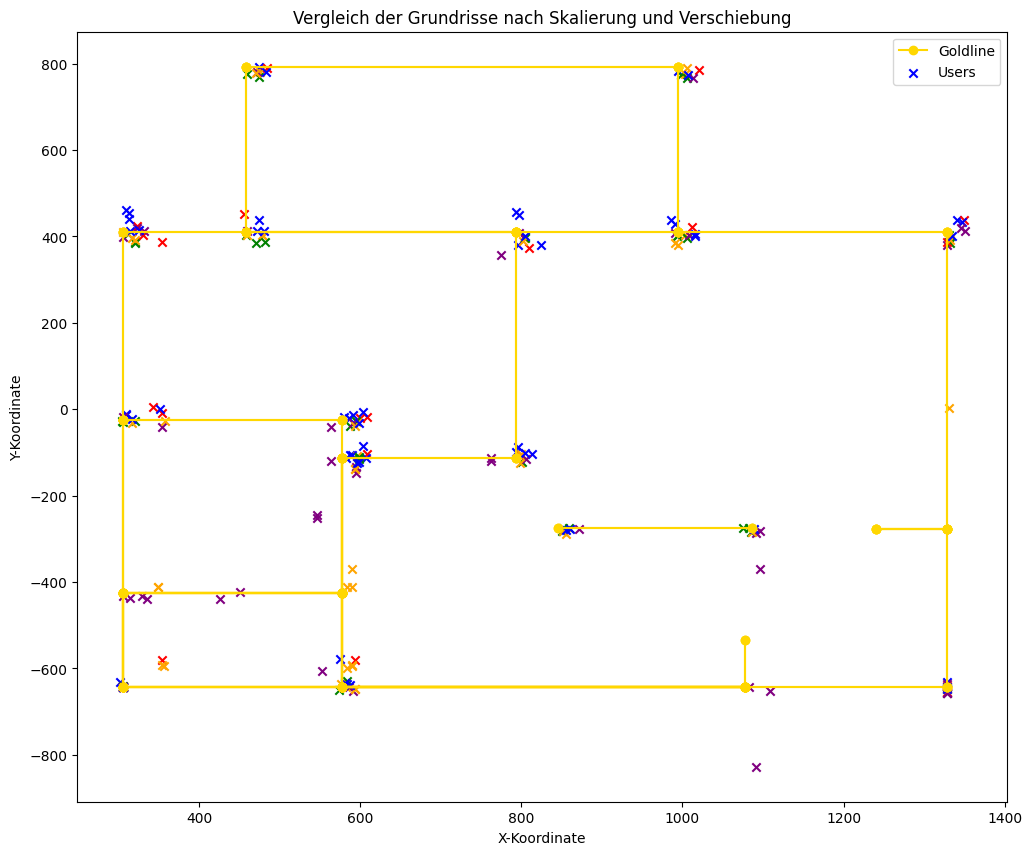

In [3]:
# Plot der beiden Grundrisse
plt.figure(figsize=(12, 10))

# Goldline zeichnen
for i in range(0, len(goldline_data["pointOrder"]) - 1, 2):
    p1 = goldline_data["pointOrder"][i]
    p2 = goldline_data["pointOrder"][i+1]
    plt.plot(
        [goldline_points[p1][0], goldline_points[p2][0]],
        [goldline_points[p1][1], goldline_points[p2][1]],
        color='gold', marker='o', label='Goldline' if i == 0 else ""
    )

# Verarbeite jedes Benutzerdaten-Set
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Farben für die Benutzerdaten
for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Benutzerpunkte zeichnen (skaliert und verschoben)
    plt.scatter(
        aligned_user_points[:, 0],
        aligned_user_points[:, 1],
        color=colors[idx % len(colors)], marker='x', label='Users' if idx == 0 else ""
    )

plt.legend()
plt.title('Vergleich der Grundrisse nach Skalierung und Verschiebung')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.show()

In [420]:

# Berechnung der Distanz zwischen allen Punkten im Goldline-Grundriss und den Punkten im skalierten Benutzer-Grundriss
def calculate_distances(points1, points2):
    distances = np.zeros((points1.shape[0], points2.shape[0]))
    for i in range(points1.shape[0]):
        for j in range(points2.shape[0]):
            distances[i, j] = np.linalg.norm(points1[i] - points2[j])
    return distances

# Berechne die Distanzen
distances = calculate_distances(goldline_points, aligned_user_points)

# Finde die minimale Distanz für jeden Punkt im Goldline-Grundriss
min_distances = np.min(distances, axis=1)

# Berechne durchschnittliche und maximale Abweichung
average_deviation = np.mean(min_distances)
max_deviation = np.max(min_distances)

# Berechne die durchschnittliche Distanz im Goldline-Grundriss
goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
average_goldline_distance = np.mean(goldline_distances)

# Berechne die prozentuale Abweichung relativ zur durchschnittlichen Distanz
average_deviation_percentage = (average_deviation / average_goldline_distance) * 100
max_deviation_percentage = (max_deviation / average_goldline_distance) * 100

# Ausgabe der Ergebnisse
print(f"Skalierungsfaktor: {scale_factor}")
print(f"Durchschnittliche Abweichung: {average_deviation}")
print(f"Maximale Abweichung: {max_deviation}")
print(f"Durchschnittliche Abweichung (Prozent): {average_deviation_percentage:.2f}%")
print(f"Maximale Abweichung (Prozent): {max_deviation_percentage:.2f}%")


Skalierungsfaktor: 0.6324653990071436
Durchschnittliche Abweichung: 5.622583365960402
Maximale Abweichung: 64.09828014256894
Durchschnittliche Abweichung (Prozent): 2.37%
Maximale Abweichung (Prozent): 27.04%


Folgende Überlegung:
Wenn jeder Punkte des goldlabels mit den jeweils allen punkten des Users verglichen werden, fallen zusätzliche punkte welcher der User gezeichent haben könnte nicht negativ auf. (Beispielsweiße irgendwelche zusätzlichen durch den user erkannten Wände, die im goldlabel keine ecken sind)
Lösungsansatz:
Auch umgekehrte betrachtung, also alle punkte des users mit dem goldlabel vergleichen, wenn nun zusätzliche punkte da sind, spiegeln diese sich negativ wieder.

Von beiden Ansätzen den durchschnitt für eien gesamt abweichung nehemen?

Bei diesen beiden Metriken ist noch das problem, dass die Linien nicht betrachtet werden, also die Verbindung zwischen den einzelnen punkten ist egal

In [421]:

# Berechnung der Distanz zwischen allen Punkten in zwei Punktmengen
def calculate_distances(points1, points2):
    distances = np.zeros((points1.shape[0], points2.shape[0]))
    for i in range(points1.shape[0]):
        for j in range(points2.shape[0]):
            distances[i, j] = np.linalg.norm(points1[i] - points2[j])
    return distances

# Berechne Abweichungen von Goldline-Punkten zu Benutzer-Punkten
def calculate_deviations_from_goldline(goldline_points, user_points, scale_factor):
    distances = calculate_distances(goldline_points, user_points)
    
    min_distances_goldline = np.min(distances, axis=1)
    average_deviation_goldline = np.mean(min_distances_goldline)
    max_deviation_goldline = np.max(min_distances_goldline)

    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    average_deviation_percentage_goldline = (average_deviation_goldline / average_goldline_distance) * 100
    max_deviation_percentage_goldline = (max_deviation_goldline / average_goldline_distance) * 100

    return {
        'scale_factor': scale_factor,
        'average_deviation_goldline': average_deviation_goldline,
        'max_deviation_goldline': max_deviation_goldline,
        'average_deviation_percentage_goldline': average_deviation_percentage_goldline,
        'max_deviation_percentage_goldline': max_deviation_percentage_goldline
    }

# Berechne Abweichungen von Benutzer-Punkten zu Goldline-Punkten
def calculate_deviations_from_user(goldline_points, user_points, scale_factor):
    distances_reverse = calculate_distances(user_points, goldline_points)
    
    min_distances_user = np.min(distances_reverse, axis=1)
    average_deviation_user = np.mean(min_distances_user)
    max_deviation_user = np.max(min_distances_user)

    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    average_deviation_percentage_user = (average_deviation_user / average_goldline_distance) * 100
    max_deviation_percentage_user = (max_deviation_user / average_goldline_distance) * 100

    return {
        'scale_factor': scale_factor,
        'average_deviation_user': average_deviation_user,
        'max_deviation_user': max_deviation_user,
        'average_deviation_percentage_user': average_deviation_percentage_user,
        'max_deviation_percentage_user': max_deviation_percentage_user
    }

# Berechne die Abweichungen aus beiden Perspektiven
def calculate_combined_deviations(goldline_points, user_points, scale_factor):
    deviations_goldline = calculate_deviations_from_goldline(goldline_points, user_points, scale_factor)
    deviations_user = calculate_deviations_from_user(goldline_points, user_points, scale_factor)

    return {
        'deviations_goldline': deviations_goldline,
        'deviations_user': deviations_user
    }

# Beispiel für den goldline_points (die goldline_points sollten bereits definiert sein)
goldline_points = reshape_points(goldline_data["segmentPoints"])

# Ergebnisse für jedes Benutzerdaten-Set berechnen
for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Berechne kombinierte Abweichungen
    combined_deviations = calculate_combined_deviations(goldline_points, aligned_user_points, scale_factor)

    # Ausgabe der Ergebnisse für die Goldline zu Benutzer-Punkte Perspektive
    print(f"Ergebnisse für Benutzer {idx+1} (Goldline zu Benutzer) -> zuweinge punkte vergleihcne zu goldline:")
    print(f"  Skalierungsfaktor: {combined_deviations['deviations_goldline']['scale_factor']}")
    print(f"  Durchschnittliche Abweichung: {combined_deviations['deviations_goldline']['average_deviation_goldline']:.2f}")
    print(f"  Maximale Abweichung: {combined_deviations['deviations_goldline']['max_deviation_goldline']:.2f}")
    print(f"  Durchschnittliche Abweichung (Prozent): {combined_deviations['deviations_goldline']['average_deviation_percentage_goldline']:.2f}%")
    print(f"  Maximale Abweichung (Prozent): {combined_deviations['deviations_goldline']['max_deviation_percentage_goldline']:.2f}%")
    print()

    # Ausgabe der Ergebnisse für die Benutzer zu Goldline-Punkte Perspektive
    print(f"Ergebnisse für Benutzer {idx+1} (Benutzer zu Goldline) ->zustätzliche punkte durch user verglichen zu goldline:")
    print(f"  Skalierungsfaktor: {combined_deviations['deviations_user']['scale_factor']}")
    print(f"  Durchschnittliche Abweichung: {combined_deviations['deviations_user']['average_deviation_user']:.2f}")
    print(f"  Maximale Abweichung: {combined_deviations['deviations_user']['max_deviation_user']:.2f}")
    print(f"  Durchschnittliche Abweichung (Prozent): {combined_deviations['deviations_user']['average_deviation_percentage_user']:.2f}%")
    print(f"  Maximale Abweichung (Prozent): {combined_deviations['deviations_user']['max_deviation_percentage_user']:.2f}%")
    print()



Ergebnisse für Benutzer 1 (Goldline zu Benutzer) -> zuweinge punkte vergleihcne zu goldline:
  Skalierungsfaktor: 0.915310050504634
  Durchschnittliche Abweichung: 12.98
  Maximale Abweichung: 150.77
  Durchschnittliche Abweichung (Prozent): 5.47%
  Maximale Abweichung (Prozent): 63.59%

Ergebnisse für Benutzer 1 (Benutzer zu Goldline) ->zustätzliche punkte durch user verglichen zu goldline:
  Skalierungsfaktor: 0.915310050504634
  Durchschnittliche Abweichung: 6.94
  Maximale Abweichung: 33.67
  Durchschnittliche Abweichung (Prozent): 2.93%
  Maximale Abweichung (Prozent): 14.20%

Ergebnisse für Benutzer 2 (Goldline zu Benutzer) -> zuweinge punkte vergleihcne zu goldline:
  Skalierungsfaktor: 0.43478746212771224
  Durchschnittliche Abweichung: 7.89
  Maximale Abweichung: 65.31
  Durchschnittliche Abweichung (Prozent): 3.33%
  Maximale Abweichung (Prozent): 27.54%

Ergebnisse für Benutzer 2 (Benutzer zu Goldline) ->zustätzliche punkte durch user verglichen zu goldline:
  Skalierungsfak

In [4]:
#Gibt die abweichung von goldline zu user und user zu goldline aus. Und die gesamtabweichung. als aaray


# Berechnung der Distanz zwischen allen Punkten in zwei Punktmengen
def calculate_distances(points1, points2):
    distances = np.zeros((points1.shape[0], points2.shape[0]))
    for i in range(points1.shape[0]):
        for j in range(points2.shape[0]):
            distances[i, j] = np.linalg.norm(points1[i] - points2[j])
    return distances

# Berechne Abweichungen von Goldline-Punkten zu Benutzer-Punkten
def calculate_deviations_from_goldline(goldline_points, user_points, scale_factor):
    distances = calculate_distances(goldline_points, user_points)
    
    min_distances_goldline = np.min(distances, axis=1)
    average_deviation_goldline = np.mean(min_distances_goldline)
    max_deviation_goldline = np.max(min_distances_goldline)

    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    average_deviation_percentage_goldline = (average_deviation_goldline / average_goldline_distance) * 100
    max_deviation_percentage_goldline = (max_deviation_goldline / average_goldline_distance) * 100

    return {
        'scale_factor': scale_factor,
        'average_deviation_goldline': average_deviation_goldline,
        'max_deviation_goldline': max_deviation_goldline,
        'average_deviation_percentage_goldline': average_deviation_percentage_goldline,
        'max_deviation_percentage_goldline': max_deviation_percentage_goldline
    }

# Berechne Abweichungen von Benutzer-Punkten zu Goldline-Punkten
def calculate_deviations_from_user(goldline_points, user_points, scale_factor):
    distances_reverse = calculate_distances(user_points, goldline_points)
    
    min_distances_user = np.min(distances_reverse, axis=1)
    average_deviation_user = np.mean(min_distances_user)
    max_deviation_user = np.max(min_distances_user)

    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    average_deviation_percentage_user = (average_deviation_user / average_goldline_distance) * 100
    max_deviation_percentage_user = (max_deviation_user / average_goldline_distance) * 100

    return {
        'scale_factor': scale_factor,
        'average_deviation_user': average_deviation_user,
        'max_deviation_user': max_deviation_user,
        'average_deviation_percentage_user': average_deviation_percentage_user,
        'max_deviation_percentage_user': max_deviation_percentage_user
    }

# Berechne die Abweichungen aus beiden Perspektiven
def calculate_combined_deviations(goldline_points, user_points, scale_factor):
    deviations_goldline = calculate_deviations_from_goldline(goldline_points, user_points, scale_factor)
    deviations_user = calculate_deviations_from_user(goldline_points, user_points, scale_factor)

    return {
        'deviations_goldline': deviations_goldline,
        'deviations_user': deviations_user
    }

def calculate_average_deviation_percentage(average_deviation, reference_value):
    return (average_deviation / reference_value) * 100

def calculate_combined_average_deviation_percentage(deviations_goldline, deviations_user, average_goldline_distance):
    avg_deviation_goldline = deviations_goldline['average_deviation_goldline']
    avg_deviation_user = deviations_user['average_deviation_user']
    combined_average_deviation = (avg_deviation_goldline + avg_deviation_user) / 2
    combined_average_deviation_percentage = calculate_average_deviation_percentage(combined_average_deviation, average_goldline_distance)
    return combined_average_deviation_percentage


def zusammengefassteAbweichungGoldUser(golddurchschnitt, userdurchschnitt):
    zugefGoldUser = (golddurchschnitt + userdurchschnitt) /2
    return zugefGoldUser



# Beispiel für den goldline_points (die goldline_points sollten bereits definiert sein)
goldline_points = reshape_points(goldline_data["segmentPoints"])

all_results = []

for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Berechne kombinierte Abweichungen
    combined_deviations = calculate_combined_deviations(goldline_points, aligned_user_points, scale_factor)

    # Berechne die durchschnittliche Distanz zwischen Goldline-Punkten für Prozentsatz-Berechnung
    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    # Berechne kombinierte durchschnittliche Abweichung und deren Prozentwert
    combined_avg_deviation_percentage = calculate_combined_average_deviation_percentage(combined_deviations['deviations_goldline'], combined_deviations['deviations_user'], average_goldline_distance)
    

    zusammenAbweichungGoldUser = zusammengefassteAbweichungGoldUser(combined_deviations['deviations_goldline']['average_deviation_goldline'],combined_deviations['deviations_user']['average_deviation_user'])
    # Speichern der Ergebnisse im Array
    result = {
        "user_index": idx + 1,
        "goldline_to_user": {
            "  Durchschnittliche Abweichung":combined_deviations['deviations_goldline']['average_deviation_goldline'],
            "  Maximale Abweichung":combined_deviations['deviations_goldline']['max_deviation_goldline'],
            "average_deviation_percentage": combined_deviations['deviations_goldline']['average_deviation_percentage_goldline'],
            "max_deviation_percentage": combined_deviations['deviations_goldline']['max_deviation_percentage_goldline']
        },
        "user_to_goldline": {
            "  Durchschnittliche Abweichung":combined_deviations['deviations_user']['average_deviation_user'],
            "  Maximale Abweichung":combined_deviations['deviations_user']['max_deviation_user'],
            "average_deviation_percentage": combined_deviations['deviations_user']['average_deviation_percentage_user'],
            "max_deviation_percentage": combined_deviations['deviations_user']['max_deviation_percentage_user']
        },
        "combined_avg_deviation_percentage": combined_avg_deviation_percentage,
        "durchschnittswertGold_User": zusammenAbweichungGoldUser
    }
    all_results.append(result)

# Jetzt sind alle Ergebnisse für alle Benutzer im "all_results" Array gespeichert und können weiterverwendet werden.


print(all_results)


[{'user_index': 1, 'goldline_to_user': {'  Durchschnittliche Abweichung': 110.68839000451668, '  Maximale Abweichung': 364.90820936951616, 'average_deviation_percentage': 15.240971927123056, 'max_deviation_percentage': 50.245159178398005}, 'user_to_goldline': {'  Durchschnittliche Abweichung': 21.67138664453088, '  Maximale Abweichung': 51.71025291504951, 'average_deviation_percentage': 2.983989517397868, 'max_deviation_percentage': 7.12011903859604}, 'combined_avg_deviation_percentage': 9.112480722260461, 'durchschnittswertGold_User': 66.17988832452377}, {'user_index': 2, 'goldline_to_user': {'  Durchschnittliche Abweichung': 87.13721439036445, '  Maximale Abweichung': 251.27477464541013, 'average_deviation_percentage': 11.99814938384284, 'max_deviation_percentage': 34.59867639423247}, 'user_to_goldline': {'  Durchschnittliche Abweichung': 8.759744283993864, '  Maximale Abweichung': 19.228075546356934, 'average_deviation_percentage': 1.2061519434484442, 'max_deviation_percentage': 2.6

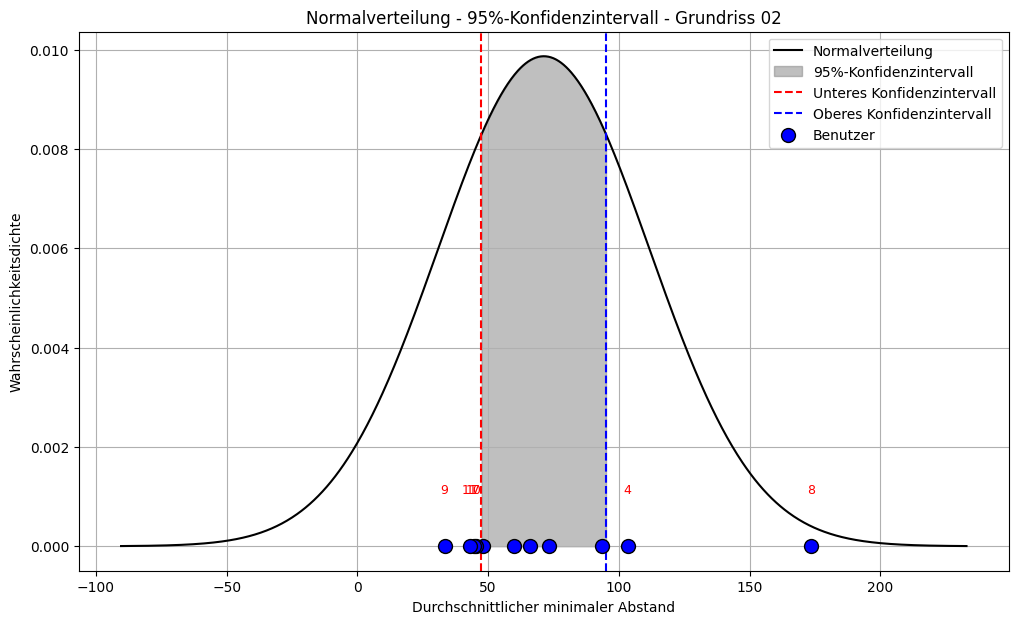

In [5]:
from scipy import stats

# Extrahiere die Werte für 'durchschnittswertGold_User'
durchschnittliche_abstaende = [eintrag['durchschnittswertGold_User'] for eintrag in all_results]
user_indizes = [eintrag['user_index'] for eintrag in all_results]

# Berechnung des Mittelwerts und der Standardabweichung
mittelwert = np.mean(durchschnittliche_abstaende)
std_abweichung = np.std(durchschnittliche_abstaende, ddof=1)  # ddof=1 für Stichproben-Standardabweichung

# Berechnung des Standardfehlers
n = len(durchschnittliche_abstaende)
standardfehler = std_abweichung / np.sqrt(n)

# Berechnung des 95%-Konfidenzintervalls
z_wert = 1.96  # für 95% Konfidenzintervall
margin_of_error = z_wert * standardfehler
konfidenzintervall = (mittelwert - margin_of_error, mittelwert + margin_of_error)

# Identifikation von Ausreißern basierend auf dem Konfidenzintervall
ausserhalb_konfidenzintervall = (np.array(durchschnittliche_abstaende) < konfidenzintervall[0]) | (np.array(durchschnittliche_abstaende) > konfidenzintervall[1])

# Erstellen der Normalverteilung
x = np.linspace(mittelwert - 4*std_abweichung, mittelwert + 4*std_abweichung, 1000)
y = stats.norm.pdf(x, mittelwert, std_abweichung)

# Plot
plt.figure(figsize=(12, 7))
plt.plot(x, y, color='black', label='Normalverteilung')
plt.fill_between(x, 0, y, where=(x >= konfidenzintervall[0]) & (x <= konfidenzintervall[1]), color='gray', alpha=0.5, label='95%-Konfidenzintervall')

# Konfidenzintervall Grenzen
plt.axvline(konfidenzintervall[0], color='red', linestyle='--', label='Unteres Konfidenzintervall')
plt.axvline(konfidenzintervall[1], color='blue', linestyle='--', label='Oberes Konfidenzintervall')

# Alle Benutzer darstellen
plt.scatter(durchschnittliche_abstaende, np.zeros(len(durchschnittliche_abstaende)), color='blue', zorder=5, label='Benutzer', s=100, edgecolor='black')

# Benutzer, die außerhalb des Konfidenzintervalls liegen, markieren und beschriften
for i, abstand in enumerate(durchschnittliche_abstaende):
    if ausserhalb_konfidenzintervall[i]:
        plt.text(abstand, 0.001, f'{user_indizes[i]}', color='red', ha='center', va='bottom', fontsize=9)

plt.title('Normalverteilung - 95%-Konfidenzintervall - Grundriss 02')
plt.xlabel('Durchschnittlicher minimaler Abstand')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.legend()
plt.grid(True)
plt.show()

In [424]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Beispiel für die Funktionen zum Umformen der Punkte, Berechnen der Extreme, etc.
def reshape_points(points):
    return np.array(points).reshape(-1, 2)

def get_extreme_points(points):
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    min_y = np.min(points[:, 1])
    max_y = np.max(points[:, 1])
    bottom_left = points[np.argmin(points[:, 0] + points[:, 1])]
    top_right = points[np.argmax(points[:, 0] - points[:, 1])]
    return bottom_left, top_right

def calculate_diagonal_length(p1, p2):
    return np.linalg.norm(p1 - p2)

def scale_points(points, factor):
    return points * factor

def calculate_translation_vector(source_bottom_left, target_bottom_left, factor):
    return target_bottom_left - (source_bottom_left * factor)

def translate_points(points, translation):
    return points + translation

# Berechnung der Distanz zwischen allen Punkten in zwei Punktmengen
def calculate_distances(points1, points2):
    distances = np.zeros((points1.shape[0], points2.shape[0]))
    for i in range(points1.shape[0]):
        for j in range(points2.shape[0]):
            distances[i, j] = np.linalg.norm(points1[i] - points2[j])
    return distances

def calculate_deviations_from_goldline(goldline_points, user_points, scale_factor):
    distances = calculate_distances(goldline_points, user_points)
    min_distances_goldline = np.min(distances, axis=1)
    average_deviation_goldline = np.mean(min_distances_goldline)
    max_deviation_goldline = np.max(min_distances_goldline)
    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)
    average_deviation_percentage_goldline = (average_deviation_goldline / average_goldline_distance) * 100
    max_deviation_percentage_goldline = (max_deviation_goldline / average_goldline_distance) * 100
    return {
        'scale_factor': scale_factor,
        'average_deviation_goldline': average_deviation_goldline,
        'max_deviation_goldline': max_deviation_goldline,
        'average_deviation_percentage_goldline': average_deviation_percentage_goldline,
        'max_deviation_percentage_goldline': max_deviation_percentage_goldline
    }

def calculate_deviations_from_user(goldline_points, user_points, scale_factor):
    distances_reverse = calculate_distances(user_points, goldline_points)
    min_distances_user = np.min(distances_reverse, axis=1)
    average_deviation_user = np.mean(min_distances_user)
    max_deviation_user = np.max(min_distances_user)
    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)
    average_deviation_percentage_user = (average_deviation_user / average_goldline_distance) * 100
    max_deviation_percentage_user = (max_deviation_user / average_goldline_distance) * 100
    return {
        'scale_factor': scale_factor,
        'average_deviation_user': average_deviation_user,
        'max_deviation_user': max_deviation_user,
        'average_deviation_percentage_user': average_deviation_percentage_user,
        'max_deviation_percentage_user': max_deviation_percentage_user
    }

def calculate_combined_deviations(goldline_points, user_points, scale_factor):
    deviations_goldline = calculate_deviations_from_goldline(goldline_points, user_points, scale_factor)
    deviations_user = calculate_deviations_from_user(goldline_points, user_points, scale_factor)
    return {
        'deviations_goldline': deviations_goldline,
        'deviations_user': deviations_user
    }

# Beispiel für die goldline_points (die goldline_points sollten bereits definiert sein)
goldline_points = reshape_points(goldline_data["segmentPoints"])
goldline_bottom_left, goldline_top_right = get_extreme_points(goldline_points)
goldline_diagonal_length = calculate_diagonal_length(goldline_bottom_left, goldline_top_right)

all_deviations = {'deviations_goldline': {'average_deviation_goldline': [], 'max_deviation_goldline': [], 'average_deviation_percentage_goldline': [], 'max_deviation_percentage_goldline': []},
                  'deviations_user': {'average_deviation_user': [], 'max_deviation_user': [], 'average_deviation_percentage_user': [], 'max_deviation_percentage_user': []}}

# Ergebnisse für jedes Benutzerdaten-Set berechnen
for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Berechne kombinierte Abweichungen
    combined_deviations = calculate_combined_deviations(goldline_points, aligned_user_points, scale_factor)

    # Speichern der Abweichungen für Boxplot
    all_deviations['deviations_goldline']['average_deviation_goldline'].append(combined_deviations['deviations_goldline']['average_deviation_goldline'])
    all_deviations['deviations_goldline']['max_deviation_goldline'].append(combined_deviations['deviations_goldline']['max_deviation_goldline'])
    all_deviations['deviations_goldline']['average_deviation_percentage_goldline'].append(combined_deviations['deviations_goldline']['average_deviation_percentage_goldline'])
    all_deviations['deviations_goldline']['max_deviation_percentage_goldline'].append(combined_deviations['deviations_goldline']['max_deviation_percentage_goldline'])

    all_deviations['deviations_user']['average_deviation_user'].append(combined_deviations['deviations_user']['average_deviation_user'])
    all_deviations['deviations_user']['max_deviation_user'].append(combined_deviations['deviations_user']['max_deviation_user'])
    all_deviations['deviations_user']['average_deviation_percentage_user'].append(combined_deviations['deviations_user']['average_deviation_percentage_user'])
    all_deviations['deviations_user']['max_deviation_percentage_user'].append(combined_deviations['deviations_user']['max_deviation_percentage_user'])

    # Ausgabe der Ergebnisse für die Goldline zu Benutzer-Punkte Perspektive
    print(f"Ergebnisse für Benutzer {idx+1} (Goldline zu Benutzer) -> zuwenige Punkte verglichen zu Goldline:")
    print(f"  Skalierungsfaktor: {combined_deviations['deviations_goldline']['scale_factor']}")
    print(f"  Durchschnittliche Abweichung: {combined_deviations['deviations_goldline']['average_deviation_goldline']:.2f}")
    print(f"  Maximale Abweichung: {combined_deviations['deviations_goldline']['max_deviation_goldline']:.2f}")
    print(f"  Durchschnittliche Abweichung (Prozent): {combined_deviations['deviations_goldline']['average_deviation_percentage_goldline']:.2f}%")
    print(f"  Maximale Abweichung (Prozent): {combined_deviations['deviations_goldline']['max_deviation_percentage_goldline']:.2f}%")
    print()

    # Ausgabe der Ergebnisse für die Benutzer zu Goldline-Punkte Perspektive
    print(f"Ergebnisse für Benutzer {idx+1} (Benutzer zu Goldline) -> zusätzliche Punkte durch Benutzer verglichen zu Goldline:")
    print(f"  Skalierungsfaktor: {combined_deviations['deviations_user']['scale_factor']}")
    print(f"  Durchschnittliche Abweichung: {combined_deviations['deviations_user']['average_deviation_user']:.2f}")
    print(f"  Maximale Abweichung: {combined_deviations['deviations_user']['max_deviation_user']:.2f}")
    print(f"  Durchschnittliche Abweichung (Prozent): {combined_deviations['deviations_user']['average_deviation_percentage_user']:.2f}%")
    print(f"  Maximale Abweichung (Prozent): {combined_deviations['deviations_user']['max_deviation_percentage_user']:.2f}%")
    print()




Ergebnisse für Benutzer 1 (Goldline zu Benutzer) -> zuwenige Punkte verglichen zu Goldline:
  Skalierungsfaktor: 0.915310050504634
  Durchschnittliche Abweichung: 12.98
  Maximale Abweichung: 150.77
  Durchschnittliche Abweichung (Prozent): 5.47%
  Maximale Abweichung (Prozent): 63.59%

Ergebnisse für Benutzer 1 (Benutzer zu Goldline) -> zusätzliche Punkte durch Benutzer verglichen zu Goldline:
  Skalierungsfaktor: 0.915310050504634
  Durchschnittliche Abweichung: 6.94
  Maximale Abweichung: 33.67
  Durchschnittliche Abweichung (Prozent): 2.93%
  Maximale Abweichung (Prozent): 14.20%

Ergebnisse für Benutzer 2 (Goldline zu Benutzer) -> zuwenige Punkte verglichen zu Goldline:
  Skalierungsfaktor: 0.43478746212771224
  Durchschnittliche Abweichung: 7.89
  Maximale Abweichung: 65.31
  Durchschnittliche Abweichung (Prozent): 3.33%
  Maximale Abweichung (Prozent): 27.54%

Ergebnisse für Benutzer 2 (Benutzer zu Goldline) -> zusätzliche Punkte durch Benutzer verglichen zu Goldline:
  Skalieru

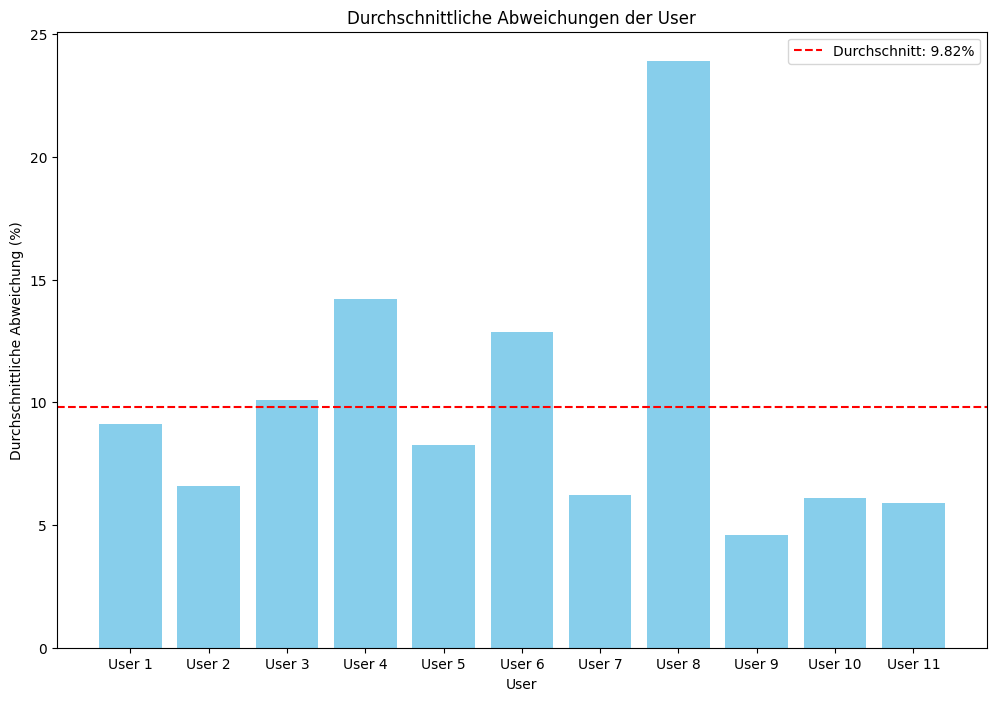

In [6]:


# Extrahieren der user_index und combined_avg_deviation_percentage
user_indices = [f'User {result["user_index"]}' for result in all_results]
combined_avg_deviations = [result['combined_avg_deviation_percentage'] for result in all_results]

# Erstellung des Balkendiagramms
plt.figure(figsize=(12, 8))
plt.bar(user_indices, combined_avg_deviations, color='skyblue')

# Titel und Beschriftungen hinzufügen
plt.title('Durchschnittliche Abweichungen der User')
plt.xlabel('User')
plt.ylabel('Durchschnittliche Abweichung (%)')

# Linie für den Durchschnitt hinzufügen
durchschnitt = sum(combined_avg_deviations) / len(combined_avg_deviations)
plt.axhline(y=durchschnitt, color='r', linestyle='--', label=f'Durchschnitt: {durchschnitt:.2f}%')
plt.legend()

# Darstellung des Diagramms
plt.show()


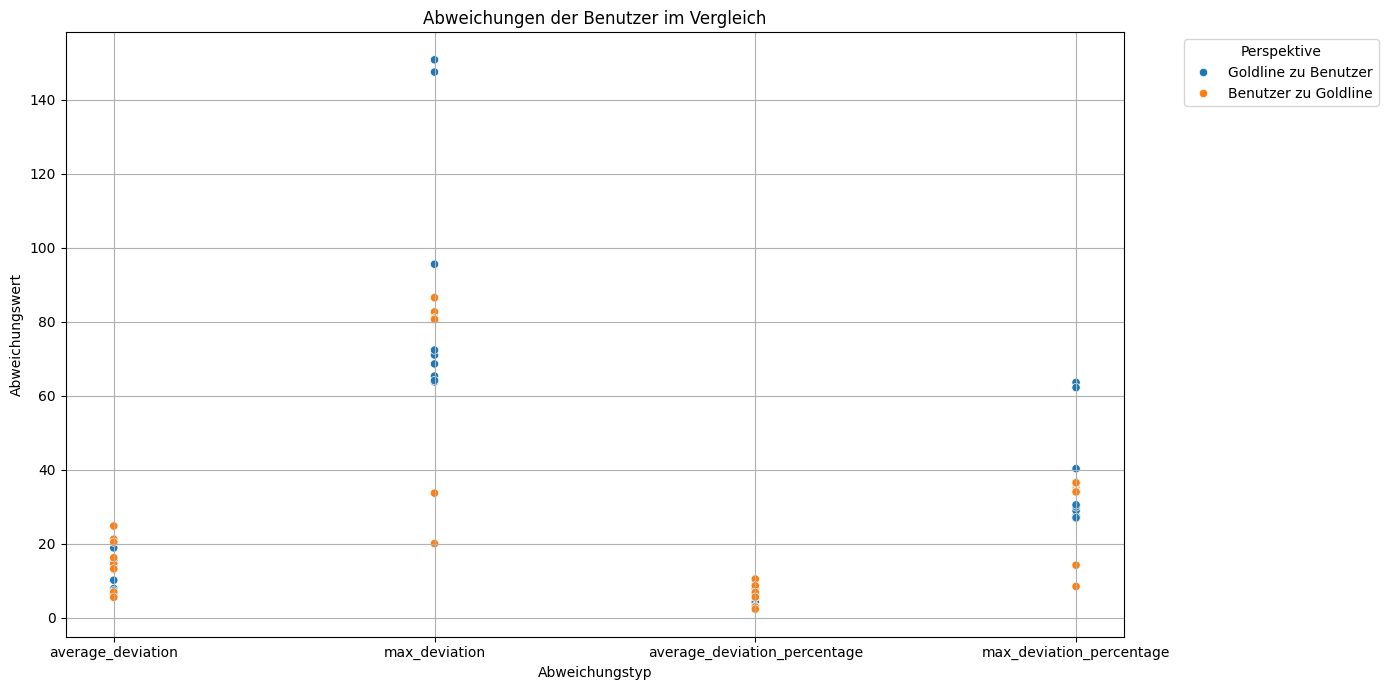

In [392]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Berechnung der Distanz zwischen allen Punkten in zwei Punktmengen
def calculate_distances(points1, points2):
    distances = np.zeros((points1.shape[0], points2.shape[0]))
    for i in range(points1.shape[0]):
        for j in range(points2.shape[0]):
            distances[i, j] = np.linalg.norm(points1[i] - points2[j])
    return distances

# Berechne Abweichungen von Goldline-Punkten zu Benutzer-Punkten
def calculate_deviations_from_goldline(goldline_points, user_points, scale_factor):
    distances = calculate_distances(goldline_points, user_points)
    
    min_distances_goldline = np.min(distances, axis=1)
    average_deviation_goldline = np.mean(min_distances_goldline)
    max_deviation_goldline = np.max(min_distances_goldline)

    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    average_deviation_percentage_goldline = (average_deviation_goldline / average_goldline_distance) * 100
    max_deviation_percentage_goldline = (max_deviation_goldline / average_goldline_distance) * 100

    return {
        'scale_factor': scale_factor,
        'average_deviation_goldline': average_deviation_goldline,
        'max_deviation_goldline': max_deviation_goldline,
        'average_deviation_percentage_goldline': average_deviation_percentage_goldline,
        'max_deviation_percentage_goldline': max_deviation_percentage_goldline
    }

# Berechne Abweichungen von Benutzer-Punkten zu Goldline-Punkten
def calculate_deviations_from_user(goldline_points, user_points, scale_factor):
    distances_reverse = calculate_distances(user_points, goldline_points)
    
    min_distances_user = np.min(distances_reverse, axis=1)
    average_deviation_user = np.mean(min_distances_user)
    max_deviation_user = np.max(min_distances_user)

    goldline_distances = np.linalg.norm(goldline_points[:, np.newaxis] - goldline_points, axis=2)
    average_goldline_distance = np.mean(goldline_distances)

    average_deviation_percentage_user = (average_deviation_user / average_goldline_distance) * 100
    max_deviation_percentage_user = (max_deviation_user / average_goldline_distance) * 100

    return {
        'scale_factor': scale_factor,
        'average_deviation_user': average_deviation_user,
        'max_deviation_user': max_deviation_user,
        'average_deviation_percentage_user': average_deviation_percentage_user,
        'max_deviation_percentage_user': max_deviation_percentage_user
    }

# Berechne die Abweichungen aus beiden Perspektiven
def calculate_combined_deviations(goldline_points, user_points, scale_factor):
    deviations_goldline = calculate_deviations_from_goldline(goldline_points, user_points, scale_factor)
    deviations_user = calculate_deviations_from_user(goldline_points, user_points, scale_factor)

    return {
        'deviations_goldline': deviations_goldline,
        'deviations_user': deviations_user
    }

# Beispiel für den goldline_points (die goldline_points sollten bereits definiert sein)
goldline_points = reshape_points(goldline_data["segmentPoints"])

# Listen zur Speicherung der Ergebnisse
goldline_to_user_results = {
    'average_deviation': [],
    'max_deviation': [],
    'average_deviation_percentage': [],
    'max_deviation_percentage': []
}

user_to_goldline_results = {
    'average_deviation': [],
    'max_deviation': [],
    'average_deviation_percentage': [],
    'max_deviation_percentage': []
}

# Ergebnisse für jedes Benutzerdaten-Set berechnen
for idx, user_data in enumerate(user_data_list):
    user_points = reshape_points(user_data["segmentPoints"])
    user_bottom_left, user_top_right = get_extreme_points(user_points)
    user_diagonal_length = calculate_diagonal_length(user_bottom_left, user_top_right)

    # Berechne den Skalierungsfaktor
    scale_factor = goldline_diagonal_length / user_diagonal_length

    # Skaliere die Benutzerpunkte
    scaled_user_points = scale_points(user_points, scale_factor)

    # Berechne die Verschiebung
    translation_vector = calculate_translation_vector(user_bottom_left, goldline_bottom_left, scale_factor)

    # Wende die Verschiebung auf die skalierten Punkte an
    aligned_user_points = translate_points(scaled_user_points, translation_vector)

    # Berechne kombinierte Abweichungen
    combined_deviations = calculate_combined_deviations(goldline_points, aligned_user_points, scale_factor)

    # Speichere die Ergebnisse für die Goldline zu Benutzer-Punkte Perspektive
    goldline_to_user_results['average_deviation'].append(combined_deviations['deviations_goldline']['average_deviation_goldline'])
    goldline_to_user_results['max_deviation'].append(combined_deviations['deviations_goldline']['max_deviation_goldline'])
    goldline_to_user_results['average_deviation_percentage'].append(combined_deviations['deviations_goldline']['average_deviation_percentage_goldline'])
    goldline_to_user_results['max_deviation_percentage'].append(combined_deviations['deviations_goldline']['max_deviation_percentage_goldline'])

    # Speichere die Ergebnisse für die Benutzer zu Goldline-Punkte Perspektive
    user_to_goldline_results['average_deviation'].append(combined_deviations['deviations_user']['average_deviation_user'])
    user_to_goldline_results['max_deviation'].append(combined_deviations['deviations_user']['max_deviation_user'])
    user_to_goldline_results['average_deviation_percentage'].append(combined_deviations['deviations_user']['average_deviation_percentage_user'])
    user_to_goldline_results['max_deviation_percentage'].append(combined_deviations['deviations_user']['max_deviation_percentage_user'])

# Umwandlung der Ergebnisse in ein DataFrame
data = []
for deviation_type in goldline_to_user_results.keys():
    for perspective, results in zip(['Goldline zu Benutzer', 'Benutzer zu Goldline'], [goldline_to_user_results, user_to_goldline_results]):
        for value in results[deviation_type]:
            data.append((perspective, deviation_type, value))

df_results = pd.DataFrame(data, columns=['Perspective', 'Deviation Type', 'Value'])

# Erstellen der Scatterplots
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Deviation Type', y='Value', hue='Perspective', data=df_results)

plt.title('Abweichungen der Benutzer im Vergleich')
plt.xlabel('Abweichungstyp')
plt.ylabel('Abweichungswert')
plt.legend(title='Perspektive', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
